In [1]:
#경제사회 나누어서 해보기
import pandas as pd
import numpy as np
from urllib.request import urlopen #url의 html 을 가져 오기 위한 패키지
from bs4 import BeautifulSoup  #크롤링 필수 패키지 설치하려면 cmd창에서 pip install bs4
import os
import re
from selenium import webdriver
from bs4 import BeautifulSoup #크롤링 도구
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm
import os
import re
import time
import json
import datetime
from konlpy.tag import Okt
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pylab as pl
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
import sklearn as skl
import sklearn.model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from ckonlpy.tag import Twitter
import string
import glob
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import warnings

data = pd.read_excel('C:/Users/USER/Desktop/1~8newsurl/covid_url38_word50_2.xlsx', index_col=0)

data_eco = data[data['category'] == '경제']
data_soc = data[data['category'] == '사회']



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


ValueError: x and y must have same first dimension, but have shapes (19,) and (24,)

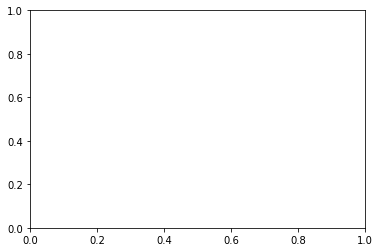

In [2]:
#경제 토픽 모델링
aa = data_eco['words']
news = [i.replace("'","").replace('[','').replace(']','').replace(' ','').split(',') for i in aa]

id2word = corpora.Dictionary(news)

texts = news

corpus = [id2word.doc2bow(text) for text in texts]

#토픽모델링 함수
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
      print(num_topics)
      model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


model_list3, coherence_values3 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=1, limit=25, step=1)

# Show graph
limit=25; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

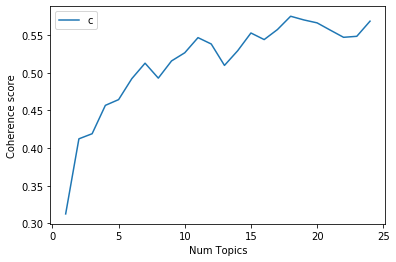

In [4]:
# Show graph
limit=25; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [8]:
# Print the coherence scores
for m, cv in zip(x, coherence_values3):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
# Select the model and print the topics
optimal_model = model_list3[10]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

Num Topics = 1  has Coherence Value of 0.3126
Num Topics = 2  has Coherence Value of 0.4124
Num Topics = 3  has Coherence Value of 0.4191
Num Topics = 4  has Coherence Value of 0.4568
Num Topics = 5  has Coherence Value of 0.4645
Num Topics = 6  has Coherence Value of 0.4923
Num Topics = 7  has Coherence Value of 0.5129
Num Topics = 8  has Coherence Value of 0.493
Num Topics = 9  has Coherence Value of 0.5159
Num Topics = 10  has Coherence Value of 0.5267
Num Topics = 11  has Coherence Value of 0.5468
Num Topics = 12  has Coherence Value of 0.5384
Num Topics = 13  has Coherence Value of 0.5099
Num Topics = 14  has Coherence Value of 0.5294
Num Topics = 15  has Coherence Value of 0.553
Num Topics = 16  has Coherence Value of 0.5442
Num Topics = 17  has Coherence Value of 0.5575
Num Topics = 18  has Coherence Value of 0.5752
Num Topics = 19  has Coherence Value of 0.5703
Num Topics = 20  has Coherence Value of 0.5664
Num Topics = 21  has Coherence Value of 0.5568
Num Topics = 22  has Coh

12
13
14
15
16
17
18
19


ValueError: x and y must have same first dimension, but have shapes (5,) and (8,)

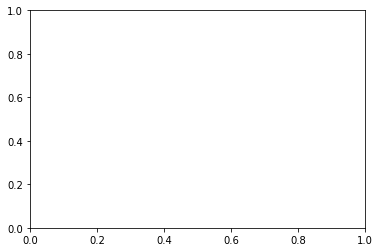

In [2]:
#사회 토픽 모델링
aa = data_soc['words']
news = [i.replace("'","").replace('[','').replace(']','').replace(' ','').split(',') for i in aa]

id2word = corpora.Dictionary(news)

texts = news

corpus = [id2word.doc2bow(text) for text in texts]

#토픽모델링 함수
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
      print(num_topics)
      model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


model_list3, coherence_values3 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=12, limit=20, step=1)

# Show graph
limit=20; start=12; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

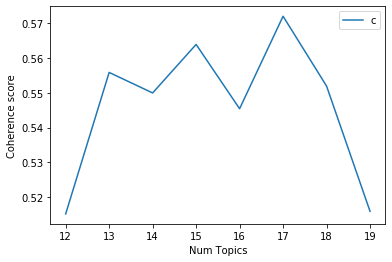

In [3]:
# Show graph
limit=20; start=12; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values3):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
# Select the model and print the topics
optimal_model = model_list3[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))